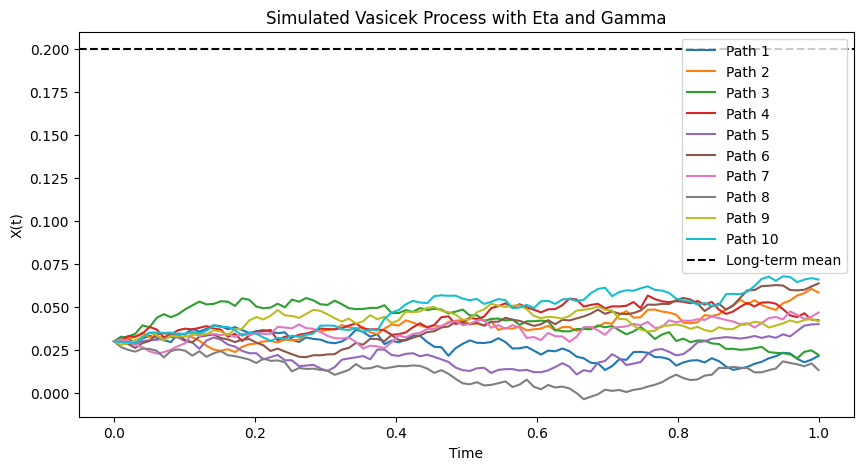

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
This script simulates the Vasicek process, a stochastic differential equation (SDE) model for interest rates.
The Vasicek model follows the Ornstein-Uhlenbeck process, which describes a mean-reverting random walk.
The continuous-time equation is:
    dr = (eta - gamma * r) dt + sigma dW
where:
    - eta: Long-term drift term
    - gamma: Mean reversion coefficient
    - sigma: Volatility term
    - dW: Brownian motion term

The discrete-time approximation used in this simulation is:
    r(i+1) = r(i) + (eta - gamma * r(i)) dt + sigma * phi * sqrt(dt)
where phi is a standard normal random variable.
"""

def simulate_vasicek(X0, eta, gamma, sigma, T, dt, N):
    """
    Simulates a modified Vasicek process with eta and gamma.
    
    Parameters:
    X0    - Initial value of the process
    eta   - Drift term
    gamma - Mean reversion term
    sigma - Volatility
    T     - Total time
    dt    - Time step
    N     - Number of paths
    """
    t_steps = int(T / dt)
    X = np.zeros((N, t_steps))
    X[:, 0] = X0
    
    for t in range(1, t_steps):
        dW = np.sqrt(dt) * np.random.randn(N)  # Random noise (standard normal)
        X[:, t] = X[:, t-1] + (eta - gamma * X[:, t-1]) * dt + sigma * dW
    
    return X

# Parameters
X0 = 0.03  # Initial value
eta = 0.02  # Drift term
gamma = 0.1  # Mean reversion coefficient
sigma = 0.02  # Volatility
T = 1  # Time in years
dt = 0.01  # Time step
N = 10  # Number of simulated paths

# Simulate and plot
X_paths = simulate_vasicek(X0, eta, gamma, sigma, T, dt, N)
time_grid = np.linspace(0, T, int(T/dt))

plt.figure(figsize=(10,5))
for i in range(N):
    plt.plot(time_grid, X_paths[i, :], label=f"Path {i+1}")
plt.axhline(eta / gamma, color='black', linestyle='dashed', label="Long-term mean")
plt.title("Simulated Vasicek Process with Eta and Gamma")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.show()